<a href="https://colab.research.google.com/github/Nicolas-HGS/Images-Digital-Processing/blob/main/Fourier_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries and modules

import cv2
import numpy
from numpy import pi,exp
import matplotlib.pyplot as plt

# DEFINE THE Img VARIABLE AS AN NDARRAY (N-DIMENSIONAL ARRAY) FROM LOADING
# THE IMAGE CONTAINED IN THE FILE "fourierteste.jpg" in grayscale mode

Img = cv2.imread("fourierteste.jpg", cv2.IMREAD_GRAYSCALE)

# Variable that will store the Fourier transform of the image "fourierteste.jpg"

Img_fourier = Img.copy()

# Determination of the number of image row and columns for application
#in the Fourier transform equation

col = Img.shape[0]
lin = Img.shape[1]

# Variable that will accumulate the sum of the Fourier transforms of the pixels
# in the image, while scanning occurs

soma = 0

In [ ]:
# Loop for the Fourier transform

for u in range (0,Img.shape[0]):
    for v in range(0, Img.shape[1]):
        for x in range(0, Img.shape[1]):
            for y in range(0, Img.shape[0]):
                soma = soma + (Img[x, y] * (exp(-numpy.emath.sqrt(-1) * 2 * pi * (((x * u) / lin) + ((y * v) / col)))))
        # Transform the result to the logaritmic scale
        soma = 20*(numpy.log(numpy.abs(soma)))
        # Assigns the pixel its Fourier transform
        Img_fourier[u, v] = round(soma)
        # Zer
        soma = 0 # Zeros the adder for the next iterator

In [ ]:
# Create a variable to store the translated Fourier transform

Imgfourier_transladada = Img_fourier.copy()

# Loop to translate the Fourier Transform

for u in range(0,Img_fourier.shape[1]): # Scan the columns
    for v in range (0,Img_fourier.shape[0]): # Scan the rows
        y = Img_fourier.shape[0]/2 - v # Translating the position y
        x = Img_fourier.shape[1]/2 - u # Translating the position x
        x = round(x) # Rounding translations
        y = round(y)
        if x < 0: # Correcting the value of the positions to values less than zero
                x = Img_fourier.shape[1] + x
        if y < 0:
                y = Img_fourier.shape[0] + y
        # Constructing the translated Fourier transform
        Imgfourier_transladada[u, v] = Img_fourier[x, y]

In [ ]:
# Using the library function

# Two-dimensional discrete Fourier transform of the image
f = numpy.fft.fft2(Img)

# Translation of the Fourier transform
fshift = numpy.fft.fftshift(f)

# Change for the logarithmic scale
transformadadefourier_deslocada_biblioteca = 20*numpy.log(numpy.abs(fshift))

# Rounds the values of the translated Fourier transform by the library and coverts
# them to integer type for the purpose of comparing the values with those of the
# translated Fourier transform of the implemented code

transformadadefourier_deslocada_biblioteca = numpy.round(transformadadefourier_deslocada_biblioteca).astype(int)

In [4]:
# Displays the result of the sum of the modulus of the differences between the elements
# of the translated Fourier transform though a library function and the elements
# of the translated Fourier transform by the implemented code

print(numpy.sum(abs(numpy.subtract(transformadadefourier_deslocada_biblioteca,Imgfourier_transladada))))

0


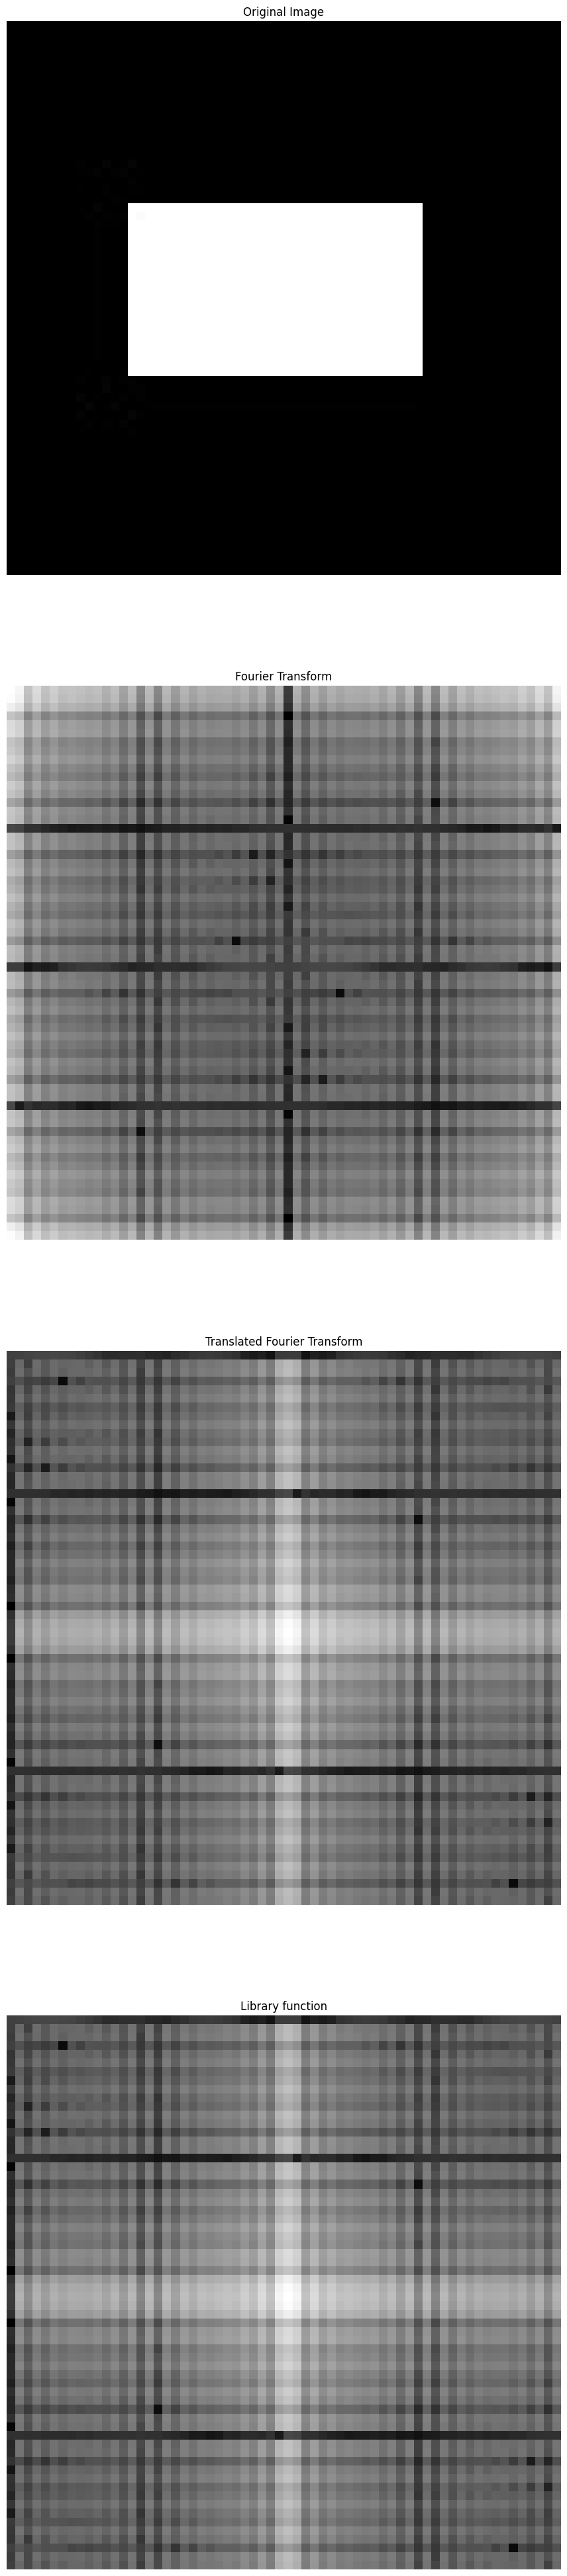

In [3]:
# Define the figure size in inches, adjusting the displayed widght and height

figura = plt.figure(figsize=(50, 50))

# Defining the dislay form, with four images one on top of the other

linhas = 4
colunas = 1

# Creating the first subplot to be displayed

figura.add_subplot(linhas, colunas, 1) # Subplot position
# Defines the data that will be displayed as an image, and in this case,
# a monochrome image due to cmap='gray'
plt.imshow(Img, cmap = 'gray')
# Disables the displayed values on the numeric axis
plt.axis('off')
plt.title("Original Image") # Image Title

# Creating the second subplot to be displayed in the same way as the previous

figura.add_subplot(linhas, colunas, 2)
plt.imshow(Img_fourier, cmap = 'gray')
plt.axis('off')
plt.title("Fourier Transform")

# Creating the third subplot to be displayed in the same way as the previous

figura.add_subplot(linhas, colunas, 3)
plt.imshow(Imgfourier_transladada, cmap = 'gray')
plt.axis('off')
plt.title("Translated Fourier Transform")

# Creating the fourth subplot to be displayed in the same way as the previous

figura.add_subplot(linhas, colunas, 4)
plt.imshow(transformadadefourier_deslocada_biblioteca, cmap = 'gray')
plt.axis('off')
plt.title("Library function")

# Exibição dos subplots

plt.show()